In [2]:
import pandas as pd
from evaluation import load_model


In [3]:
model, traindata, testdata, feature_names, target_names = load_model('GAT', '100K_accts_MID5')


In [4]:
testdata.x.shape

torch.Size([99911, 31])

                          sum    in_sum   out_sum      mean   in_mean  \
sum                  1.000000  0.646411  0.772841  0.570713  0.181000   
in_sum               0.646411  1.000000  0.015380  0.418739  0.238821   
out_sum              0.772841  0.015380  1.000000  0.399631  0.038563   
mean                 0.570713  0.418739  0.399631  1.000000  0.453652   
in_mean              0.181000  0.238821  0.038563  0.453652  1.000000   
out_mean             0.126108  0.035179  0.136002  0.274421  0.012377   
median               0.551968  0.396903  0.393227  0.929740  0.325966   
in_median            0.181758  0.245650  0.033876  0.434973  0.968227   
out_median           0.129135  0.032684  0.142044  0.270359  0.010840   
std                  0.004377  0.020992 -0.011724  0.045423  0.638356   
in_std               0.091227  0.099361  0.036910  0.292856  0.800412   
out_std             -0.155720 -0.103269 -0.118176 -0.421070 -0.053686   
max                  0.190386  0.230275  0.057971  

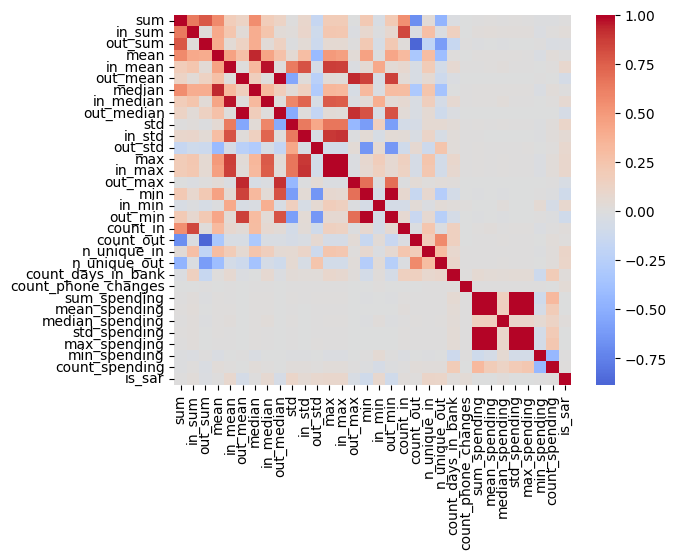

In [5]:
nodes=pd.read_csv(f'/home/agnes/desktop/flib/thesis_XAML/ultra_final_data/100K_accts_MID5/bank/train/nodes.csv')
nodes.drop(['bank','account'],axis=1,inplace=True)


#mak a cross correlation check on the features in nodes
corr=nodes.corr()
print(corr)


#color the correlation matrix 
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0,xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()


#print out a list with all the features that have a correlation higher than 0.5
corr_list=[]
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i,j])>0.5:
            corr_list.append([corr.columns[i],corr.columns[j],corr.iloc[i,j]])


In [6]:
#abs values of corr_list
for i in range(len(corr_list)):
    corr_list[i][2]=abs(corr_list[i][2])
#sort list ascending
corr_list.sort(key=lambda x: x[2],reverse=True)

corr_list

[['max_spending', 'std_spending', 0.9989459100119461],
 ['out_min', 'min', 0.9973440193798201],
 ['std_spending', 'mean_spending', 0.996448223569421],
 ['in_max', 'max', 0.9962805277809494],
 ['max_spending', 'sum_spending', 0.9941526831465162],
 ['max_spending', 'mean_spending', 0.993388023216812],
 ['std_spending', 'sum_spending', 0.990918897871812],
 ['mean_spending', 'sum_spending', 0.9886115303088808],
 ['out_median', 'out_mean', 0.9864242168142043],
 ['in_median', 'in_mean', 0.9682267526717213],
 ['median', 'mean', 0.9297403334735296],
 ['out_max', 'out_mean', 0.9278551574835268],
 ['out_max', 'out_median', 0.9104456191378728],
 ['in_max', 'in_std', 0.9027168958538825],
 ['max', 'in_std', 0.8858003013119135],
 ['count_out', 'out_sum', 0.882783711525323],
 ['max', 'in_mean', 0.8683202335534236],
 ['in_max', 'in_mean', 0.862717792368866],
 ['out_min', 'out_mean', 0.8562399444780787],
 ['min', 'out_mean', 0.8506777295263623],
 ['count_in', 'in_sum', 0.8346973950930118],
 ['in_std', 

In [7]:
#for each feature, count how many other features it correlates with more than 0.5
corr_count=[]
for i in range(len(corr.columns)):
    count=0
    for j in range(len(corr_list)):
        if corr_list[j][0]==corr.columns[i] or corr_list[j][1]==corr.columns[i]:
            count+=1
    corr_count.append([corr.columns[i],count])
    
corr_count.sort(key=lambda x: x[1],reverse=True)
corr_count

[['std', 9],
 ['sum', 6],
 ['min', 6],
 ['out_min', 6],
 ['in_mean', 5],
 ['out_mean', 5],
 ['in_median', 5],
 ['out_median', 5],
 ['in_std', 5],
 ['max', 5],
 ['in_max', 5],
 ['out_max', 4],
 ['out_sum', 3],
 ['count_out', 3],
 ['sum_spending', 3],
 ['mean_spending', 3],
 ['std_spending', 3],
 ['max_spending', 3],
 ['in_sum', 2],
 ['mean', 2],
 ['median', 2],
 ['out_std', 2],
 ['count_in', 2],
 ['n_unique_out', 2],
 ['in_min', 0],
 ['n_unique_in', 0],
 ['count_days_in_bank', 0],
 ['count_phone_changes', 0],
 ['median_spending', 0],
 ['min_spending', 0],
 ['count_spending', 0],
 ['is_sar', 0]]

In [8]:
nodes=pd.read_csv(f'/home/agnes/desktop/flib/thesis_XAML/ultra_final_data/100K_accts_MID5/bank/train/nodes.csv')
nodes.drop(['bank','account'],axis=1,inplace=True)

def corr_check(nodes):
    #mak a cross correlation check on the features in nodes
    corr=nodes.corr()
    print(corr)


    #color the correlation matrix 
    import seaborn as sns
    import matplotlib.pyplot as plt
    sns.heatmap(corr, annot=False, cmap='coolwarm', center=0,xticklabels=corr.columns,yticklabels=corr.columns)
    plt.show()


    #print out a list with all the features that have a correlation higher than 0.5
    corr_list=[]
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j])>0.5:
                corr_list.append([corr.columns[i],corr.columns[j],corr.iloc[i,j]])

    #abs values of corr_list
    for i in range(len(corr_list)):
        corr_list[i][2]=abs(corr_list[i][2])
    #sort list ascending
    corr_list.sort(key=lambda x: x[2],reverse=True)

    corr_list

    #for each feature, count how many other features it correlates with more than 0.5
    corr_count=[]
    for i in range(len(corr.columns)):
        count=0
        for j in range(len(corr_list)):
            if corr_list[j][0]==corr.columns[i] or corr_list[j][1]==corr.columns[i]:
                count+=1
        corr_count.append([corr.columns[i],count])
        
    corr_count.sort(key=lambda x: x[1],reverse=True)
    print(corr_count)


                       in_sum      mean   out_std    in_max   out_max  \
in_sum               1.000000  0.418739 -0.103269  0.222035 -0.017001   
mean                 0.418739  1.000000 -0.421070  0.468377  0.030657   
out_std             -0.103269 -0.421070  1.000000 -0.081287  0.043789   
in_max               0.222035  0.468377 -0.081287  1.000000 -0.021161   
out_max             -0.017001  0.030657  0.043789 -0.021161  1.000000   
in_min              -0.010047 -0.012244  0.056165  0.153579 -0.011707   
count_out           -0.015220 -0.319514  0.072362 -0.056163  0.041700   
n_unique_in          0.280005  0.296185 -0.114026  0.231826  0.008625   
n_unique_out        -0.016441 -0.400650  0.247803 -0.082568  0.021936   
count_days_in_bank   0.150298  0.008020  0.026202  0.076056  0.016713   
count_phone_changes -0.002429 -0.000806  0.001833  0.002884 -0.001189   
median_spending      0.015836  0.008178  0.007030  0.009580 -0.002029   
max_spending         0.019380  0.006820  0.007315  

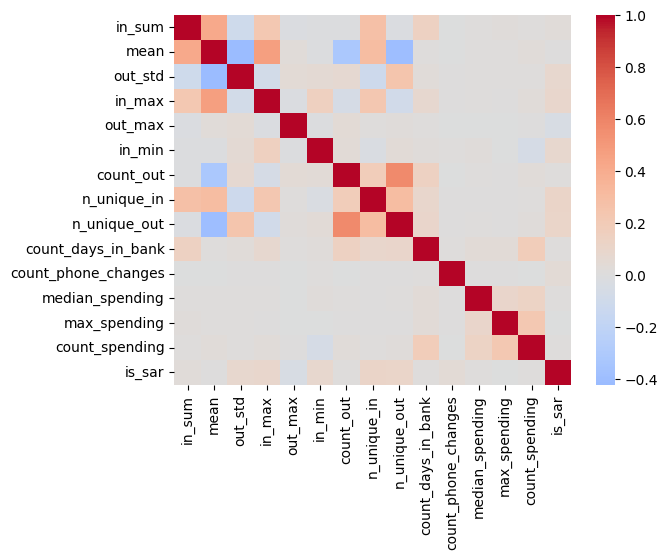

[['count_out', 1], ['n_unique_out', 1], ['in_sum', 0], ['mean', 0], ['out_std', 0], ['in_max', 0], ['out_max', 0], ['in_min', 0], ['n_unique_in', 0], ['count_days_in_bank', 0], ['count_phone_changes', 0], ['median_spending', 0], ['max_spending', 0], ['count_spending', 0], ['is_sar', 0]]


In [14]:
corr_check(nodes.drop(['std','sum','min','in_mean','out_min','in_median','sum_spending','out_sum','out_mean','mean_spending','median','max','std_spending','min_spending','out_median','in_std','count_in'],axis=1))

In [17]:
nodes=nodes.drop(['std','sum','min','in_mean','out_min','in_median','sum_spending','out_sum','out_mean','mean_spending','median','max','std_spending','min_spending','out_median','in_std','count_in'],axis=1)

In [21]:
nodes.columns

Index(['in_sum', 'mean', 'out_std', 'in_max', 'out_max', 'in_min', 'count_out',
       'n_unique_in', 'n_unique_out', 'count_days_in_bank',
       'count_phone_changes', 'median_spending', 'max_spending',
       'count_spending', 'is_sar'],
      dtype='object')